TP2
=======

**Objectif**: 

* calculer à la main la transmittance en $z$ de plusieurs filtres, et leurs propriétés.
* utiliser Python pour vérifier les calculs.


Le cours associé est le CM3, "Transformée en Z".

**Durée:** 2h

**Instructions générales:**
    
* téléchargez le fichier notebook `.ipynb` à l'adresse [www](https://gitlab.com/hazaa/oml3/-/blob/main/book/TP3-TZ.ipynb)
* **pas de compte-rendu**.
* Si vous cherchez de l'**aide** sur une fonction Python/Numpy depuis Jupyter Notebook:
   *  ouvrez une cellule et taper par exemple `?np.sin`, puis validez.
   *  sinon cherchez dans sur la documentation générale [Python](https://docs.python.org/) ou [Numpy](https://numpy.org/doc/stable/reference/)
   * tout en bas du notebook, vous trouverez un aide-mémoire des fonctions numpy utiles.

In [1]:
# code à executer en début de TP
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['font.size']=20

from scipy.fft import fft, ifft, fftfreq, fftshift

## 0) Exemple d'étude de filtre

**Attention**: la transformée en $z$ suppose qu'on travaille à temps **discret**, et pas continu.

Ci-dessous on montre comment réaliser l'analyse d'un filtre **à temps discret** avec un logiciel.

Le cas particulier qui nous sert d'exemple: un **filtre à moyenne glissante**. (voir cours)

L'**équation de récurrence** de ce filtre s'écrit:

$\begin{equation}
y_k =  \frac{1}{m} \sum_{i=0}^{m-1} x_{k-i}
\end{equation}
$

* Le filtre est **non-récursif**. 
* Ses coefficients sont:
   *  $a_0=1, ~a_1=0, ~a_2=0,\ldots$
   *  $b_0=1/m, ~b_1=1/m, \ldots,~b_{m-1}=1/m, ~b_m=0, b_{m+1}=0,\ldots$
* Sa transmittance en $z$ est:
   $H(z)=\frac{1}{m} \frac{1+z^{-1} + \ldots + z^{-(m-1)}}{1}$


Avec **Python**, on dispose des outils suivants:
    
* la fonction ```lfilter(b,a,x)``` calcule la réponse à un signal ```x``` d'un filtre dont les coefficients sont les vecteurs ```b``` et ```a``` définis ci-dessus. Voir la documentation de [lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) pour plus de détail.
* la fonction ```freqz(b,a)``` calcule la réponse fréquentielle. Voir la documentation de [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz) pour plus de détail. 

**Attention**: `a` et `b` ci-dessus sont les tableaux $[a_0, a_1,\ldots]$ et $[b_0, b_1,\ldots]$, où $a_0,\ldots ~b_0, \ldots$ ont été vus en cours et en TD.

Exemples: 

* si $a_0=1$ puis $a_1=0, ~a_2=0, \ldots$, on aura en Python: ```a=np.array([1])```
* si $b_0=1$ et $b_1=-1$, puis $b_2=0, ~b_3=0, \ldots$, , on aura en Python: ```b=np.array([1,-1])```



### a) Réponse impulsionnelle

<h3> a) Réponse impulsionnelle   </h3>

On rappelle que:

* la **réponse impulsionnelle** est la réponse d'un filtre lorsque son entrée est une impulsion de Dirac.
* à temps **discret**, l'impulsion de Dirac est définie par (voir CM3) $\delta[k]=0$ si $k\neq 0$, et $\delta[k]=1$ si $k=0$.

Ci-dessous on va calculer la réponse $y_k$ du filtre à une impulsion de Dirac discrète, de **deux manières**: à la main et avec la fonction `lfilter`.

A la main, on utilise l'équation de récurrence $y_k =  \frac{1}{m} \sum_{i=0}^{m-1} x_{k-i}$ avec $m=2$: 
    
Pour trouver $y_0$, on pose $k=0$ puis on en déduit:

$\begin{eqnarray}
y_0 &=&  \frac{1}{2} \sum_{i=0}^{1} x_{0-i} \\
&=& \frac{1}{2} ( x_0 + x_{-1} )\\
&=& \frac{1}{2} (1 + 0 )\\
&=& \frac{1}{2}
\end{eqnarray}
$
   
Pour $y_1$, on recommence avec $k=1$.   
    
    
Puis on remplit le tableau:
    
|$k$|$y_k$|    
|---|---|    
|0|$\frac{1}{2}$|    
|1|$\frac{1}{2}$|    
|2|$0$|    
|$\vdots$||    
|10|$0$|    
    
Puis on trace:

(0.0, 1.0)

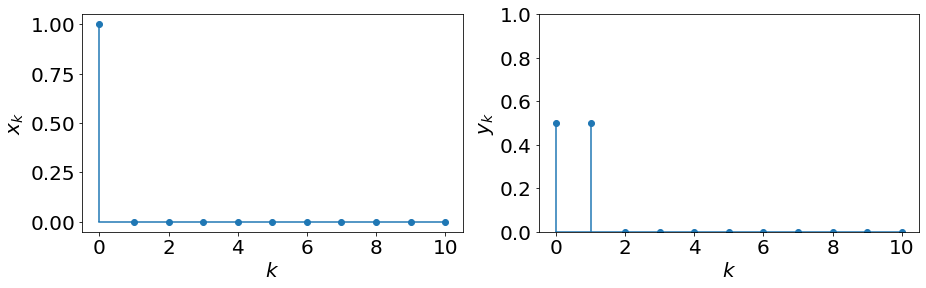

In [27]:
k = [0,1,2,3,4,5,6,7,8,9,10]
xk=[1,0,0,0,0,0,0,0,0,0,0]
yk = [1/2,1/2,0,0,0,0,0,0,0,0,0]

# affichage
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(k,xk,use_line_collection=True, basefmt='C0-')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(k,yk,use_line_collection=True, basefmt='C0-')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$y_k$')
ax[1].set_ylim([0,1])

On recommence, avec Python/Scipy et la fonction `lfilter`:

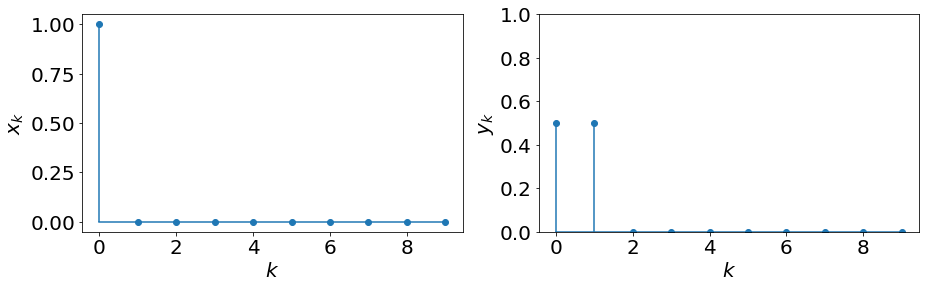

In [28]:
# FILTRAGE: moyenne mobile

# paramètres du filtre (voir ci-dessus)
a = np.array([1.0])
m = 2
b = 1/m*np.ones(m)

# input= Dirac
x = np.zeros(10); x[0]=1

# calcul de la sortie
y=signal.lfilter(b, a, x)

# affichage
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x,use_line_collection=True, basefmt='C0-')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(y,use_line_collection=True, basefmt='C0-')
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)


**Commentaire**: 

on retrouve bien le même diagramme pour $y_k=f(k)$

    
    
    
    

### b) Réponse indicielle

<h3> b) Réponse indicielle </h3>

On rappelle que:

* la **réponse indicielle** est la réponse d'un filtre lorsque son entrée est une échelon $u[k]$.
* à temps **discret**, l'échelon est définie par (voir CM3) $u[k]=0$ si $k<0$, et $u[k]=1$ si $k \geq 0$.

Ci-dessous on utilise directement la fonction `lfilter` pour calculer la réponse $y_k$:

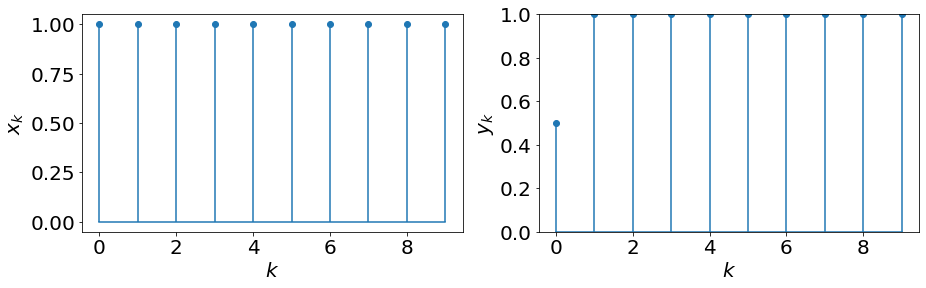

In [29]:
# paramètres du filtre
a = np.array([1.0])
m = 2
b = 1/m*np.ones(m)

# input= échelon
x = np.ones(10)

# calcul de la sortie
y=signal.lfilter(b, a, x)

# affichage
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x,use_line_collection=True, basefmt='C0-')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(y,use_line_collection=True, basefmt='C0-')
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)

### c) Réponse fréquentielle
<h3> c) Réponse fréquentielle  </h3>

**A la main**:

On commence par calculer à la main $\omega \rightarrow \vert H(e^{j\omega})\vert$ pour $m=2$.

On a déjà vu (cf DS blanc) que pour $y_k=x_k+x_{k-1}$, on avait $\vert H(e^{j\omega})\vert=2\cos(\frac{\omega}{2})$

On en déduit que pour $y_k=\frac{1}{2}(x_k+x_{k-1})$, on a $\vert H(e^{j\omega})\vert=\cos(\frac{\omega}{2})$

On trace:

Text(0.5, 0, '$\\omega$ [rad/sample]')

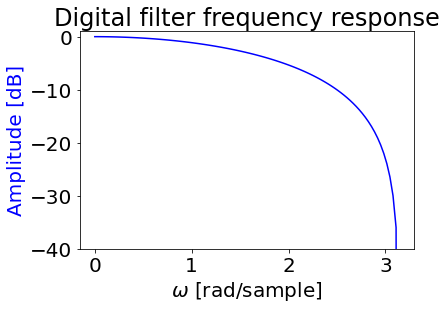

In [24]:
#calcul
omega = np.linspace(0,np.pi,100)
h=np.cos(omega/2)

#affichage
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
#ax1.plot(omega, h, 'b')
ax1.plot(omega, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_ylim([-40,1])
ax1.set_xlabel('$\omega$ [rad/sample]')

**Avec Python/Scipy**: on trace la réponse dans le domaine fréquentiel avec ```freqz```

Text(0.5, 0, '$\\omega$ [rad/sample]')

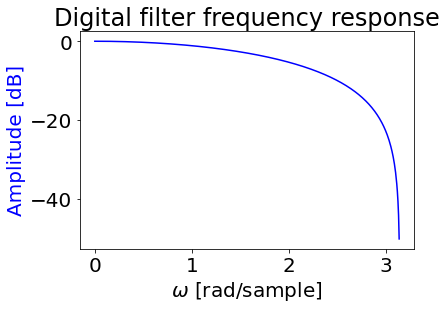

In [26]:
# paramètres du filtre
a = np.array([1.0])
m = 2
b = 1/m*np.ones(m)

# réponse frequentielle
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz
w, h = signal.freqz(b,a)

# affichage
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('$\omega$ [rad/sample]')

**Commentaire**:

on retrouve bien le même résultat.

## 1)  Exercice 

**Travail demandé:**  Répéter toutes les étapes données dans l'exemple introductif pour les filtres ci-dessous:

*  filtre dérivateur: $y_k =  x_k - x_{k-1}$
*  filtre de lissage: $y_k =  x_k + 2 x_{k-1} + x_{k-2}$

Note: on n'aura plus besoin de $m$ pour traiter ces deux cas.

## 2) BONUS: filtrage d'un signal réel, analyse avec ```fft```

A faire à la fin si vous avez tout fini.

On a vu la transformée de Fourier discète (TFD) en TP2, notamment l'usage de la fonction ```fft``` pour approximer la transformée de Fourier.

Ci-dessous on se donne un signal auquel on va ajouter du bruit, puis on va essayer de le **débruiter** avec un filtre récursif passe-bas $a=[1.0, -0.6], ~b=[.4]$ 


(NB: c'est à ça que servent les filtres la plupart du temps, car il y a souvent du bruit de mesure).


**Travail demandé**:

* filtrer le signal avec le passe-bas ci-dessus.
* Pour comprendre si on a réussi à débruiter le signal, on demande de calculer la TFD du signal: sans bruit, avec bruit **avant** le débruitage, puis **après** le débruitage.
* conclure: a-t-on réussi ou pas ? Justifiez.


Text(0.5, 0, 't')

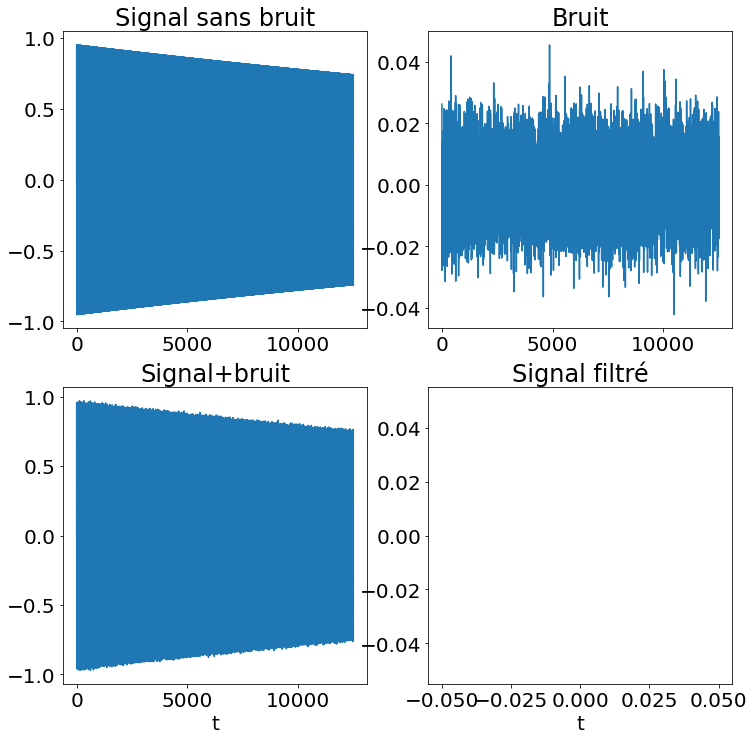

In [2]:
#création d'un signal bruité (cf Brecher §12.6.2)
A = 0.01               # amplitude du bruit

f=100                  # fréquence du signal sinusoïdal
Fs = 5*f               # fréquence d'échantillonnage
tau = 100              # facteur d'atténuation 
nper = 5               # nombre de périodes complètes mesurées
t = np.arange(0, int(nper*Fs/f), 1/Fs)  # base de temps 
N = t.shape[0]                          


s = np.exp( - t/tau ) * np.sin( 2 * np.pi * f * t  ) # signal non bruité
w = A * np.random.randn(N)                           # bruit
x = s + w                                            # signal bruité


# filtre                  
# a = np.array([ ???? ])  # => A MODIFIER !!!!!!!!!
# b = np.array([???])     # => A MODIFIER !!!!!!!!! 
y= 0                      # => A MODIFIER !!!!!!!!! 

# affichage
fig,ax = plt.subplots(2,2, figsize=(12,12))     # plusieurs graphes. 2 lignes, 2 colonnes

ax[0,0].plot(s)                                 # ax[0,0]: graphe première ligne première colonne                
ax[0,0].set_title( "Signal sans bruit")

ax[0,1].plot(w)
ax[0,1].set_title("Bruit")

ax[1,0].plot(x)
ax[1,0].set_title("Signal+bruit" )
ax[1,0].set_xlabel('t')

ax[1,1].plot(y)
ax[1,1].set_title("Signal filtré" )
ax[1,1].set_xlabel('t')

Puis on calcule les `fft` de chacun des signaux:

In [ ]:
# fft
X_nonoise = ???????
W = ????????
X_noisy = ???????????
X_denoise = ??????????????

# fréquences
freq = fftshift(fftfreq(s.shape[0], 1/Fs))

# affichage
ylim = [1e-1,3e2]
fig,ax = plt.subplots(2,2, figsize=(12,12))     # plusieurs graphes. 2 lignes, 2 colonnes
ax[0,0].semilogy(freq, ???)           # ax[0,0]: graphe première ligne première colonne                
ax[0,0].set_xlabel('frequence (Hz)')  
ax[0,0].set_ylabel('Re(TFD)')
ax[0,0].set_ylim(ylim)

ax[0,1].semilogy(freq, ????)                
ax[0,1].set_xlabel('frequence (Hz)')
ax[0,1].set_ylabel('Re(TFD)')
ax[0,1].set_ylim(ylim)


ax[1,0].semilogy(freq, ????)                 
ax[1,0].set_xlabel('frequence (Hz)')
ax[1,0].set_ylabel('Re(TFD)')
ax[1,0].set_ylim(ylim)

ax[1,1].semilogy(freq, ????)                 
ax[1,1].set_xlabel('frequence (Hz)')
ax[1,1].set_ylabel('Re(TFD)')
ax[1,1].set_ylim(ylim)

Annexe
--------------

**Résumé des fonctions Python/Numpy/Scipy**

| |Fonction | Exemple |
|--- | ---|--- |
|vecteur composé de 1|`np.ones(n)` |`x=np.ones(10)`|
|vecteur composé de 0 |`np.zeros(n)`|`y=np.zeros(20)`|
|initialisation d'un vecteur numpy|`np.array(x)`|`x=np.array([1,2,3])`|
|réponse temporelle | ```lfilter``` | `y=signal.lfilter(b, a, x)` |
|réponse fréquentielle | ```freqz``` | `w, h = signal.freqz(b,a)`|
| bruit gaussien | `np.random.randn`| `e=np.random.randn( 1 )` |
| bruit uniforme | `np.random.rand`| `e=np.random.rand( 1 )` |
|trace fonction à temps discret| `stem` | `fig,ax = plt.subplots(); ax[0].stem(x)`|

### Références

<h3> Références  </h3>

    
* poly Bercher §11 "digital filters"    
* matlab:
    *  https://fr.mathworks.com/help/signal/ug/practical-introduction-to-digital-filtering.html
    *  https://fr.mathworks.com/help/signal/ug/practical-introduction-to-digital-filter-design.html    

### Notes pour le prof

<h3> Notes pour le prof   </h3>


dirac etc: bercher p.20

convol: bercher p.57 ; compare with np.convolve

filtering: bercher p.18

1er des 3 exos cottet chap 9: 

comparer :

* réponse théorique à la main (discrète)  et continu (laplace) déja calculé en TD5. 
* réponse numériq (avec  python numpy/scipy  lfilt) 


morain-nicolier, livre gargour
* réponse fréquentielle: gargour p.177


cottet: exos 2 et 3 du chap 9: 

comparer :

* réponse théorique à la main (discrète)  et continu (laplace) déja calculé en TD5. 
* réponse numériq (avec  python numpy/scipy  lfilt) 


Exercice: tracer la réponse à plusieurs sinusoïdes dans le domaine temporel, relever l'amplitude dans un tableau

In [ ]:
# réponse à un sinus dans le domaine temporel
# FILTRAGE: passe bas
# input= sinus

a = np.array([1.0, -0.9])
b = np.array([.1])

n=100
t=np.arange(n)

fig,ax = plt.subplots(2,2,figsize=(15,7))
w = 2*np.pi*0.2

x = np.sin(w *t) #+0.7*np.random.rand(n)
y=signal.lfilter(b, a, x)

    ax[i,0].plot(t,x)
    ax[i,0].set_xlabel(r'$k$')
    ax[i,0].set_ylabel(r'$x_k$')
    ax[i,1].plot(t,y)
    ax[i,1].set_ylabel(r'$y_k$')
    ax[i,1].set_xlabel(r'$k$')
    ax[i,1].set_ylim([-1,1])
    i+=1 


plt.subplots_adjust(hspace=0.8)
plt.show()
glue("fig_filter_lowpass", fig, display=False)

Exercice: retrouver l'expression du passe bas à partir de la version continue; tracer les caractéristiques sur un plot

